# What is Foursquare opinion on splitting up Belgium?

## Capstone project for Coursera IBM Data science specialization
***

Introduction



Disclaimer (at least try)

In [1]:
import numpy as np
import pandas as pd

In [19]:
df_cities = pd.read_csv("datasets\worldcitiespop.csv",dtype = {"Country": "object",
                                                               "City": "object",
                                                               "AccentCity": "object",
                                                               "Region": "object",
                                                               "Population": "float64",
                                                               "Latitude": "float64",
                                                               "Longitude": "float64"})
df_cities.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


In [7]:
print(df_cities.shape)
print(df_cities.dropna().shape)

(3173958, 7)
(47979, 7)


In [20]:
df_cities.dropna(inplace = True)

In [12]:
len(df_cities["Country"].unique())

209

In [15]:
df_countrycode = pd.read_csv("datasets\Countrycodes.csv")
df_countrycode.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [16]:
dict_country2 = df_countrycode.set_index("alpha-2").to_dict()["name"]
dict_country2["BE"]

'Belgium'

In [21]:
df_cities["Country"] = df_cities["Country"].str.upper()
df_cities.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
6,AD,andorra la vella,Andorra la Vella,07,20430.0,42.500000,1.516667
20,AD,canillo,Canillo,02,3292.0,42.566667,1.600000
32,AD,encamp,Encamp,03,11224.0,42.533333,1.583333
49,AD,la massana,La Massana,04,7211.0,42.550000,1.516667
53,AD,les escaldes,Les Escaldes,08,15854.0,42.500000,1.533333


In [23]:
df_cities.replace({"Country": dict_country2}, inplace=True)
df_cities.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
6,Andorra,andorra la vella,Andorra la Vella,07,20430.0,42.500000,1.516667
20,Andorra,canillo,Canillo,02,3292.0,42.566667,1.600000
32,Andorra,encamp,Encamp,03,11224.0,42.533333,1.583333
49,Andorra,la massana,La Massana,04,7211.0,42.550000,1.516667
53,Andorra,les escaldes,Les Escaldes,08,15854.0,42.500000,1.533333


***
***
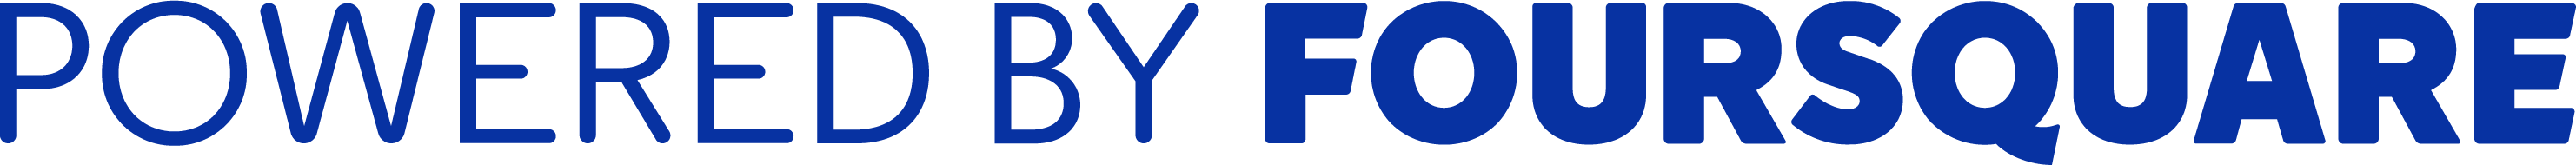
Venues data base on geoposition is from foursquare api (as required in the Capstone instruction):
> https://foursquare.com/
***
***


Dataset for list of cities with pop and lat lng downloaded from kaggle:
>https://www.kaggle.com/max-mind/world-cities-database/downloads/world-cities-database.zip/3

OPEN DATA LICENSE for MaxMind WorldCities and Postal Code Databases

Copyright (c) 2008 MaxMind Inc.  All Rights Reserved.

The database uses toponymic information, based on the Geographic Names Data Base, containing official standard names approved by
the United States
Board on Geographic Names and maintained by the National Geospatial-Intelligence Agency. More information is available at the Maps and
Geodata link at www.nga.mil. The National Geospatial-Intelligence Agency name, initials, and seal
are protected by 10 United States
Code Section 445.

It also uses free population data from Stefan Helders www.world-gazetteer.com.
Visit his website to download the free population data.  Our database
combines Stefan's population data with the list of all cities in the world.

All advertising materials and documentation mentioning features or use of
this database must display the following acknowledgment:
"This product includes data created by MaxMind, available from
http://www.maxmind.com/"

Redistribution and use with or without modification, are permitted provided
that the following conditions are met:
1. Redistributions must retain the above copyright notice, this list of
conditions and the following disclaimer in the documentation and/or other
materials provided with the distribution. 
2. All advertising materials and documentation mentioning features or use of
this database must display the following acknowledgement:
"This product includes data created by MaxMind, available from
http://www.maxmind.com/"
3. "MaxMind" may not be used to endorse or promote products derived from this
database without specific prior written permission.

THIS DATABASE IS PROVIDED BY MAXMIND.COM ``AS IS'' AND ANY 
EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED 
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE 
DISCLAIMED. IN NO EVENT SHALL MAXMIND.COM BE LIABLE FOR ANY 
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES 
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; 
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT 
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS 
DATABASE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
***
***


Dataset for cities with region used for belgium city is from geonames. I downloaded it at:
>https://datahub.io/core/world-cities#readme

***
***

Data from mapping country code to country from wikipedia downloaded at:
> https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
***
***